In [14]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg
import datetime

In [15]:
# Call dataset and clean it
raw_df = pd.read_csv("/home/rahmani/Downloads/Datasets/Food_Establishment_Inspection_Data.csv")
cols = { k:k.replace(' ','_').lower() for k in raw_df.keys()}
raw_df = raw_df.rename(columns=cols)
raw_df.city=raw_df.city.str.upper()
raw_df.drop(['program_identifier','inspection_business_name','inspection_serial_num','violation_record_id','business_id'], axis=1);
raw_df["inspection_date"]=pd.to_datetime(raw_df["inspection_date"])
raw_df['weekday'] = raw_df.inspection_date.dt.day_name()

raw_df.loc[raw_df['longitude'] > 122, 'longitude'] *=-1
not_valid_inspection_result_rows=raw_df[(raw_df.inspection_result !='Unsatisfactory') & (raw_df.inspection_result !='Complete') &
(raw_df.inspection_result !='Incomplete') & (raw_df.inspection_result !='Satisfactory')]
raw_df.drop(not_valid_inspection_result_rows.index, inplace=True)

dropindex = raw_df[raw_df['inspection_score']<0 ].index
raw_df.drop(dropindex, inplace=True)

raw_df['name'] = raw_df.name.str.strip()
insp_df = raw_df.reindex()

insp_df['inspection_closed_business'].replace({False: 0, True: 1}, inplace=True)

insp_df['name'] = insp_df['name'].str.upper()
#insp_df.to_csv('basic_df.csv')

/tmp/ipykernel_9566/245221805.py:2: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_df = pd.read_csv("/home/rahmani/Downloads/Datasets/Food_Establishment_Inspection_Data.csv")


In [16]:
filter_df = insp_df[['name', 'inspection_date', 'city']]
count_inspect_resurant = filter_df.groupby(['name', 'inspection_date']).first().reset_index()
count_inspect_city = count_inspect_resurant.groupby('city')['inspection_date'].count().reset_index()
count_name_city = filter_df.groupby(['city'])['name'].nunique().reset_index()
count_inspect_city_name = pd.concat([count_inspect_city, count_name_city], axis=1).reindex(count_name_city.index)
count_inspect_city_name = count_inspect_city_name.T.drop_duplicates().T
#count_inspect_city_name.to_csv('count_inspect_city_name.csv')
count_inspect_city

,city,inspection_date
0,ALGONA,92
1,AUBURN,5157
2,BARING,4
3,BELLEVUE,9678
4,BELLINGHAM,1
5,BLACK DIAMOND,304
6,BOTHELL,1535
7,BURIEN,2625
8,CARNATION,505
9,CLYDE HILL,73


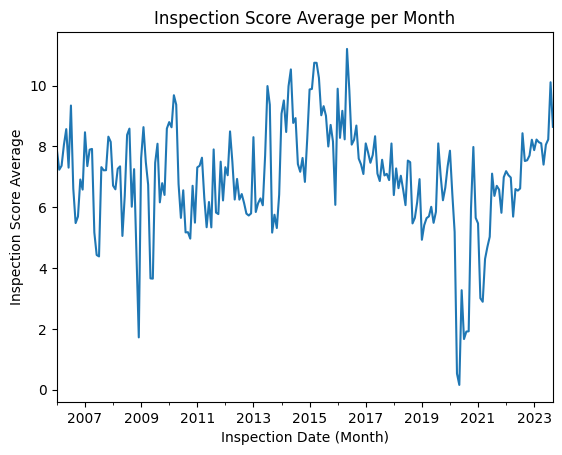

In [17]:
grouped_df=insp_df.groupby(['name', 'inspection_date', 'inspection_closed_business'])['violation_points'].sum().reset_index().rename(columns={'violation_points': 'inspection_score'})
grouped_df_time_series = grouped_df.set_index('inspection_date')
grouped_df_time_series['inspection_score'].resample('M').mean().plot()
plt.title('Inspection Score Average per Month')
plt.xlabel('Inspection Date (Month)')
plt.ylabel('Inspection Score Average')
plt.savefig("../../img/Inspection Score Average per Month.png")
#grouped_df.to_csv('Inspection Score Average per Month.csv')

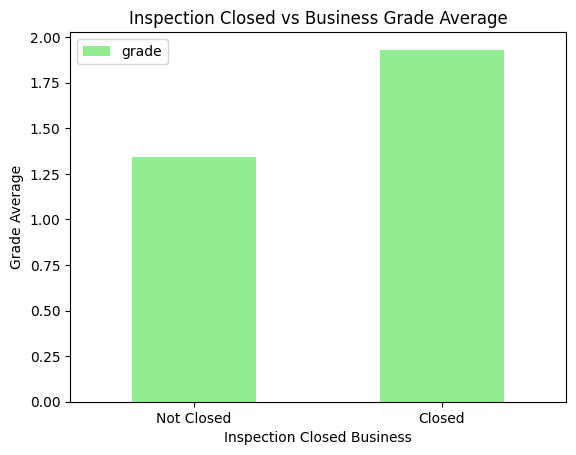

In [33]:
# drop row with null grade
#find_index_grade_null=df[df.grade.isnull()].index
#find_index_grade_null
#df.drop(find_index_grade_null, inplace=True)
grouped_df_grade=insp_df.groupby(['name', 'inspection_date', 'inspection_closed_business', 'grade'])['violation_points'].sum().reset_index().rename(columns={'violation_points': 'inspection_score'})
grouped_df_grade_mean_score= grouped_df_grade.groupby('inspection_closed_business')['grade'].mean()
x_values=['Not Closed','Closed']
ax=grouped_df_grade_mean_score.plot(
    kind='bar', x='inspection_closed_business', y='grade',
    legend=True, color='#90EE90',rot=0,
    title='Inspection Closed vs Business Grade Average')
ax.set_xticklabels(x_values)
plt.xlabel('Inspection Closed Business')
plt.ylabel('Grade Average')
plt.savefig("../../img/Inspection Closed Business_Grade Average.png")

In [19]:
grouped_df_grade.loc[(grouped_df_grade['inspection_closed_business']==1) & (grouped_df_grade['grade']==4)].count()

name                          12
inspection_date               12
inspection_closed_business    12
grade                         12
inspection_score              12
dtype: int64

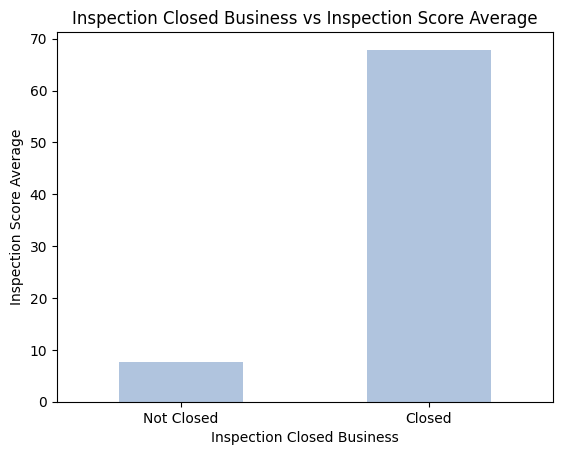

In [34]:
# EDA of score
grouped_df_grade=insp_df.groupby(['name', 'inspection_date', 'inspection_closed_business', 'grade'])['violation_points'].sum().reset_index().rename(columns={'violation_points': 'inspection_score'})
grouped_df_mean_score = grouped_df_grade.groupby('inspection_closed_business')['inspection_score'].mean().reset_index()

x_values=['Not Closed','Closed']
ax=grouped_df_mean_score.plot(kind='bar', x='inspection_closed_business', y='inspection_score', legend='', color='lightsteelblue',rot=0,
                              title='Inspection Closed Business vs Inspection Score Average' )
ax.set_xticklabels(x_values)
plt.xlabel('Inspection Closed Business')
plt.ylabel('Inspection Score Average')
plt.savefig("../../img/Inspection Closed Business_Inspection Score Average.png")

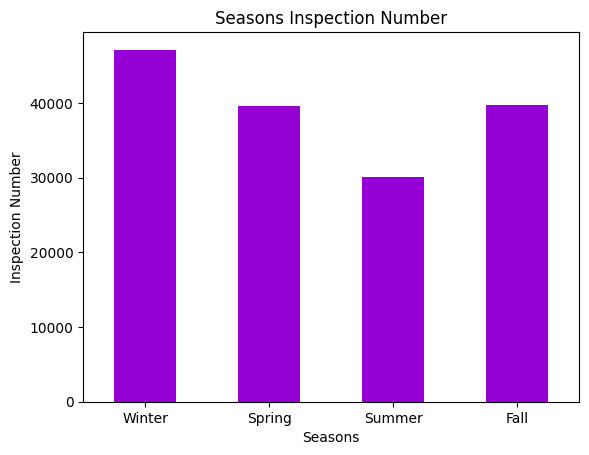

In [21]:
season_inspec_filter_df = insp_df[['name', 'inspection_date']]
season_inspec_df = season_inspec_filter_df.groupby(['name', 'inspection_date']).sum().reset_index()
season_inspec_time_series = season_inspec_df.set_index('inspection_date')
season_inspec_time_series_df=season_inspec_time_series['name'].resample('Q').count().reset_index()
season_inspec_df = season_inspec_time_series_df.groupby([season_inspec_time_series_df['inspection_date'].dt.month.rename('month')])['name'].sum().reset_index()
x_values=['Winter','Spring', 'Summer', 'Fall']
ax=season_inspec_df.plot(kind='bar', x='month', y='name', legend='', color='#9400D3',rot=0,title='Seasons Inspection Number')
ax.set_xticklabels(x_values)

plt.xlabel('Seasons')
plt.ylabel('Inspection Number')

plt.savefig("../../img/Seasons_Inspection Number.png",pad_inches=0.5)

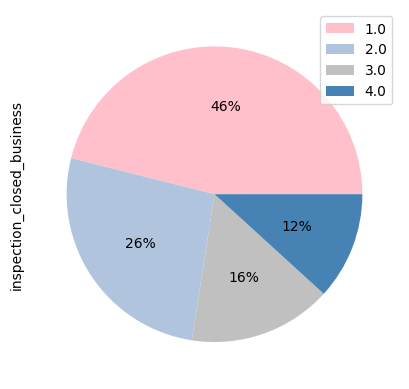

In [22]:
grouped_df_grade_close=grouped_df_grade.groupby('grade')['inspection_closed_business'].count()
grouped_df_grade_score = grouped_df_grade.loc[grouped_df_grade['inspection_closed_business']==1]
grouped_df_grade_score_ = grouped_df_grade_score.groupby('grade')['inspection_closed_business'].count().reset_index()

A = grouped_df_grade_score_.set_index('grade')
colors=['pink', 'lightsteelblue', 'silver', 'steelblue']
A.plot(kind='pie', subplots=True, colors = colors, autopct='%1.0f%%', labeldistance=None)
plt.savefig("../../img/Inspection Closed Business_Grade_Pie_plot.png")

In [23]:
grouped_df_grade_score_.set_index('grade')

,inspection_closed_business
grade,
1.0,47
2.0,27
3.0,16
4.0,12


In [24]:
grouped_df_grade

,name,inspection_date,inspection_closed_business,grade,inspection_score
0,#807 TUTTA BELLA,2021-01-06,0,1.0,0
1,#807 TUTTA BELLA,2022-01-13,0,1.0,0
2,#807 TUTTA BELLA,2022-08-31,0,1.0,10
3,#807 TUTTA BELLA,2023-03-02,0,1.0,20
4,+MAS CAFE,2020-07-29,0,2.0,0
...,...,...,...,...,...
122015,ZYLBERSCHTEIN'S DELICATESSEN & BAKERY,2021-05-12,0,2.0,15
122016,ZYLBERSCHTEIN'S DELICATESSEN & BAKERY,2022-01-26,0,2.0,15
122017,ZYLBERSCHTEIN'S DELICATESSEN & BAKERY,2023-02-01,0,2.0,20
122018,ZZ DESSERT,2022-07-28,0,1.0,5


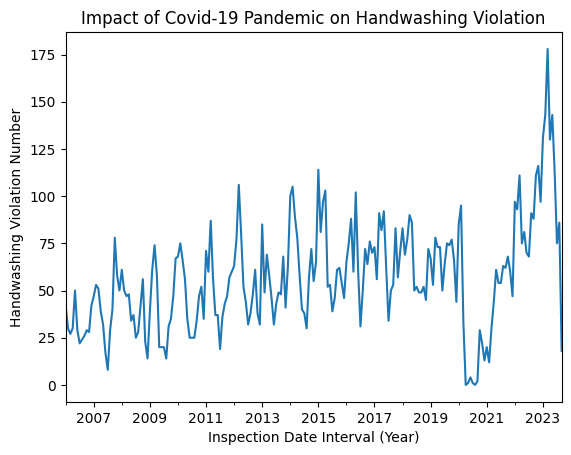

In [25]:
# Impact of Covid-19 Pandemic on Handwashing Violation
df_vio_desc = insp_df.loc[(insp_df['violation_description'].str.contains('hand')==True) & (insp_df['violation_description'].str.contains('wash')==True),['inspection_date', 'violation_description']]
#df_vio_desc[(df_vio_desc['inspection_date']>'2006-12-31')&(df_vio_desc['inspection_date']<'2007-12-31')].count()
df_vio_desc_time_series = df_vio_desc.set_index('inspection_date')
df_vio_desc_time_series['violation_description'].resample('M').count().plot()
plt.title('Impact of Covid-19 Pandemic on Handwashing Violation')
plt.xlabel('Inspection Date Interval (Year)')
plt.ylabel('Handwashing Violation Number')
#df_vio_desc.to_csv('Inspection Number per Month.csv')
plt.savefig("../../img/Impact of Covid-19 Pandemic on Handwashing Violation.png")

In [30]:
season_inspec_filter_df = insp_df[['name', 'inspection_date']]
season_inspec_df = season_inspec_filter_df.groupby(['name', 'inspection_date']).sum().reset_index()
season_inspec_time_series = season_inspec_df.set_index('inspection_date')
season_inspec_time_series_df=season_inspec_time_series['name'].resample('Q').count().reset_index()
season_inspec_df = season_inspec_time_series_df.groupby([season_inspec_time_series_df['inspection_date'].dt.month.rename('month')])['name'].sum().reset_index()
x_values=['Winter','Spring', 'Summer', 'Fall']
df_vio_desc_time_series['violation_description'].resample('M').count()
ax=df_vio_desc_time_series['violation_description'].plot(kind='bar', x='month', y='name', legend='', color='#9400D3',rot=0,title='Seasons Inspection Number')
ax.set_xticklabels(x_values)

plt.xlabel('Seasons')
plt.ylabel('Inspection Number')

# plt.savefig("../../img/Seasons_Inspection Handwash Number.png",pad_inches=0.5)

inspection_date
2017-07-24    0600 - Adequate handwashing facilities
2015-01-14    0600 - Adequate handwashing facilities
2022-08-31    0600 - Adequate handwashing facilities
2016-06-06    0600 - Adequate handwashing facilities
2010-01-15    0600 - Adequate handwashing facilities
                               ...                  
2012-03-06    0600 - Adequate handwashing facilities
2008-07-16           Adequate handwashing facilities
2021-02-03    0600 - Adequate handwashing facilities
2023-02-01    0600 - Adequate handwashing facilities
2019-09-25    0600 - Adequate handwashing facilities
Name: violation_description, Length: 12063, dtype: object

In [14]:
pd.to_datetime(grouped_df['inspection_date']).dt.month.value_counts()

inspection_date
3     16970
10    15298
1     15244
2     14902
4     14627
5     14191
11    12635
9     12530
12    11805
6     10775
8      9381
7      8198
Name: count, dtype: int64

Text(0, 0.5, 'Inspection Number')

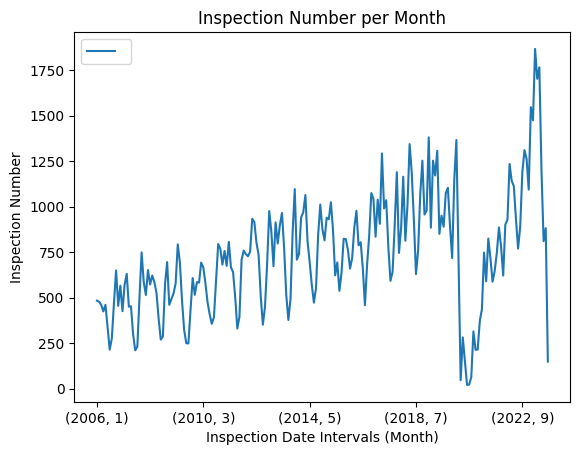

In [58]:
# Number of inspection
grouped_df=insp_df.groupby(['name', 'inspection_date', 'inspection_closed_business'])['violation_points'].sum().reset_index().rename(columns={'violation_points': 'inspection_score'})
grouped_df['year'] = grouped_df['inspection_date'].dt.year
grouped_df['month'] = grouped_df['inspection_date'].dt.month
grouped_time = grouped_df.groupby(['year', 'month']).size()
grouped_time.plot(legend=True)
plt.title('Inspection Number per Month')
plt.xlabel('Inspection Date Intervals (Month)')
plt.ylabel('Inspection Number')
#grouped_df.to_csv('Inspection Number per Month.csv')
#plt.savefig("../../img/Inspection Number per Month.png")

In [16]:
grouped_df.loc[(grouped_df['inspection_closed_business']==1)&(grouped_df['inspection_score']==0)&(insp_df['description'].str.contains('Seating')),:].count()

name                          13
inspection_date               13
inspection_closed_business    13
inspection_score              13
year                          13
month                         13
dtype: int64

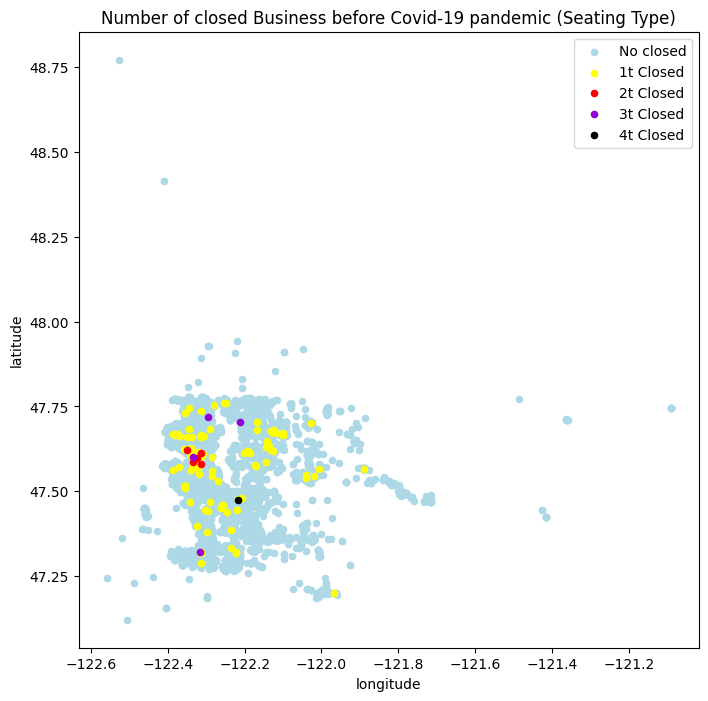

In [39]:
my_df = insp_df.groupby(['name', 'latitude', 'longitude', 'inspection_date', 'inspection_closed_business']).agg('size').reset_index()
# my_df.to_csv('file3.csv')

my_df_revised = my_df.loc[:, ['name', 'latitude', 'longitude', 'inspection_date', 'inspection_closed_business']]
my_df_revised_close=my_df_revised.groupby(['name', 'latitude', 'longitude'])['inspection_closed_business'].sum().reset_index().rename(columns={'inspection_closed_business': 'close_count'})


no_close = my_df_revised_close.loc[my_df_revised_close['close_count']==0]
one_close= my_df_revised_close.loc[my_df_revised_close['close_count'] ==1]
two_close= my_df_revised_close.loc[my_df_revised_close['close_count'] ==2]
three_close= my_df_revised_close.loc[my_df_revised_close['close_count'] ==3]
four_close= my_df_revised_close.loc[my_df_revised_close['close_count'] ==4]

ax = no_close.plot(kind='scatter', x='longitude', y='latitude', color='#ADD8E6', figsize=(8, 8))
one_close.plot(kind='scatter',ax=ax, x='longitude', color='yellow', y='latitude')
two_close.plot(kind='scatter',ax=ax, x='longitude', color='red', y='latitude')
three_close.plot(kind='scatter',ax=ax, x='longitude', color='#9400D3', y='latitude')
four_close.plot(kind='scatter',ax=ax, x='longitude', color='black', y='latitude')
plt.title('Number of closed Business before Covid-19 pandemic (Seating Type)')
plt.legend(["No closed", "1t Closed", "2t Closed", "3t Closed", "4t Closed"])
plt.savefig('map_number_close.png')

In [ ]:
one_close.to_csv('one_close.csv')
two_close.to_csv('two_close.csv')
three_close.to_csv('three_close.csv')
four_close.to_csv('four_close.csv')